# Part 2 - Letter Recognization

Load the letter-recognition.data.csv file, and do the letter classifications. You are free to choose all the machine learning algorithms we have covered so far. Moreover, apply the ensemble learning covered in Chapter 7 to improve your classification results.

#### Dataset Information:

The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.

We can now load our data into x and y. We call y - labels the letters since that is what we want to predict and the rest will be our design matrix

In [1]:
import numpy as np

X_data = np.loadtxt("letter-recognition.data.csv", delimiter=',', usecols=range(1,16))

In [2]:
y_data = np.loadtxt("letter-recognition.data.csv", delimiter=',', dtype=np.object, usecols=range(0,1))

Split our dataset into training and testing

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=4000, random_state=42)

In [4]:
X_train.shape

(16000, 15)

In [5]:
X_test.shape

(4000, 15)

Lets split our training set into training and validation

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1000, random_state=42)

In [7]:
X_train.shape

(15000, 15)

In [8]:
X_val.shape

(1000, 15)

## Lets Try Some Classifiers! 

Let's try some different classifiers and check how well they do on our data.
We will try the following:
- RandomForestClassifier
- ExtraTreesClassifier
- MLPClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

mlp_clf = MLPClassifier(max_iter=1200, random_state=42)

svm_clf = SVC(gamma="auto", random_state=42, probability=True)

In [10]:
estimators = [random_forest_clf, extra_trees_clf, mlp_clf, svm_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Training the ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)
Training 

Lets test the models on the validation set

In [ ]:
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for clf in estimators:
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(data=confusion_matrix(y_val, y_pred), annot=True,ax=ax)
    plt.show()

Our accuracy looks pretty good for the validation. Can we improve on this?

## Improvements

Lets try to improve our score using a voting classifier

#### Hard 

In [12]:
from sklearn.ensemble import VotingClassifier

voting_hard_clf = VotingClassifier(
    estimators=[('rf', random_forest_clf), ('et', extra_trees_clf), ('mlp', mlp_clf), ('svm', svm_clf)],
    voting='hard')

In [13]:
voting_hard_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
          

Lets test the classifer on both the validation and test set

VotingClassifier 0.966


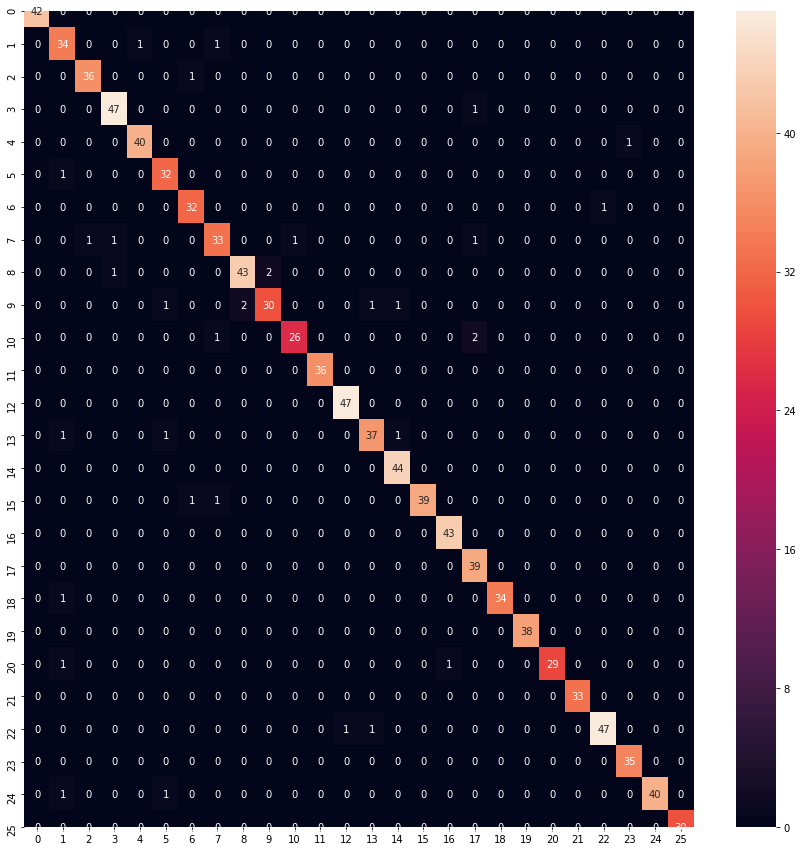

In [14]:
from sklearn.metrics import accuracy_score

y_pred = voting_hard_clf.predict(X_val)
print("VotingClassifier", accuracy_score(y_val, y_pred))

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=confusion_matrix(y_val, y_pred), annot=True,ax=ax)
plt.show()

#### Soft 

In [15]:
from sklearn.ensemble import VotingClassifier

voting_soft_clf = VotingClassifier(
    estimators=[('rf', random_forest_clf), ('et', extra_trees_clf), ('mlp', mlp_clf), ('svm', svm_clf)],
    voting='soft')

In [16]:
voting_soft_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
          

Lets test the classifer on both the validation and test set

VotingClassifier 0.965


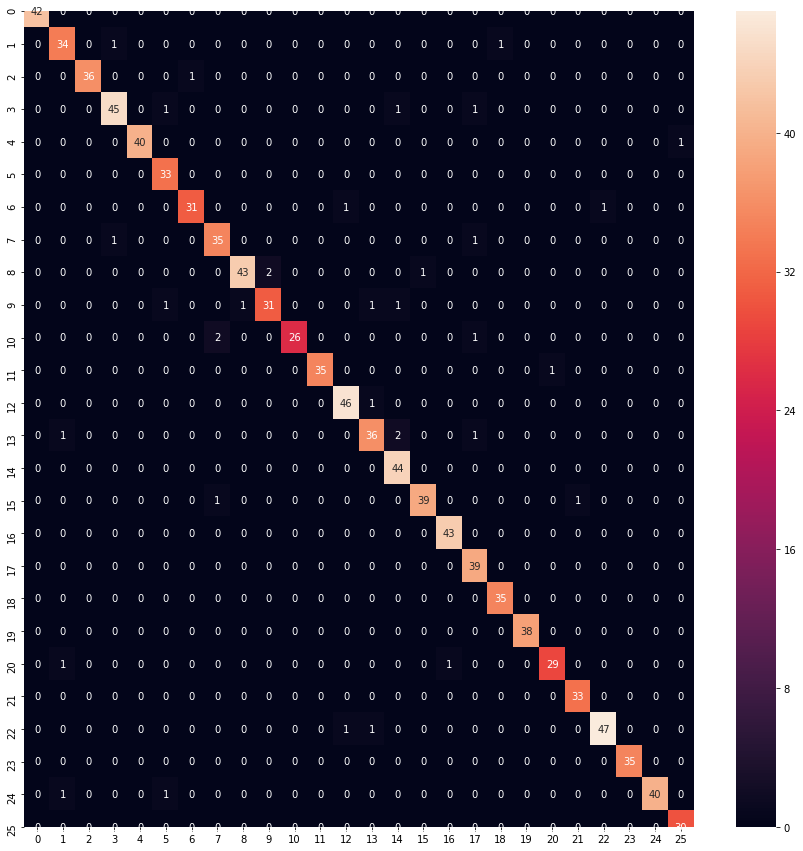

In [17]:
from sklearn.metrics import accuracy_score

y_pred = voting_soft_clf.predict(X_val)
print("VotingClassifier", accuracy_score(y_val, y_pred))

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=confusion_matrix(y_val, y_pred), annot=True,ax=ax)
plt.show()

We notice that our hard voting classifier is better than soft one. It also seeem to perform slighty better than the individual classifiers.

Lets try to run our hard voting classifier and individual classifiers all on the test set and compare

In [18]:
from sklearn.metrics import accuracy_score

for clf in (forest_clf, extra_trees_clf, mlp_clf, voting_hard_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

NameError: name 'forest_clf' is not defined

So not the most significant update but is a little better. Lets look at that the confusion matrix

In [ ]:
y_voting_pred = voting_hard_clf.predict(X_test)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=confusion_matrix(y_test, y_voting_pred), annot=True,ax=ax)
plt.show()

Lets try another voting classifier using different set of individual classifiers to see if we can improve
- RandomForestClassifier
- ExtraTreesClassifier
- Support Vector Machine
- KNeighborsClassifier

Lets define our KNN classifier and just check its accuracy 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

In [ ]:
y_knn_pred = knn_clf.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score

print(knn_clf.__class__.__name__, accuracy_score(y_val, y_pred))
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=confusion_matrix(y_val, y_pred), annot=True,ax=ax)
plt.show()

## New Voting Classifier

Now lets try another voting classifier. We will use the hard voting since that seems to do good

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', random_forest_clf), ('et', extra_trees_clf), ('KNN', knn_clf),('svm', svm_clf)],
    voting='hard')

In [ ]:
voting_clf.fit(X_train, y_train)

In [ ]:
y_pred = voting_clf.predict(X_val)
print("VotingClassifier", accuracy_score(y_val, y_pred))

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=confusion_matrix(y_val, y_pred), annot=True,ax=ax)
plt.show()

 Looks better than before. Lets check on the test set

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (forest_clf, extra_trees_clf, knn_clf, voting_hard_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Looks well. Nice improvment on the individual scores. I think this is a good point to accept as the increase in score is slow and approaching 100

In [ ]:
y_voting_pred = voting_clf.predict(X_test)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=confusion_matrix(y_test, y_voting_pred), annot=True,ax=ax)
plt.show()